# cmap2d Demo
This notebook demonstrates several different ways of using the [cmap2d](https://github.com/oderby/cmap2d) package, and serves as de facto documentation.

In [ ]:
%matplotlib inline
%load_ext autoreload
% autoreload 2

import cmap2d
import math
import numpy as np

# Creating ColorMaps
To start, let's see a simple example of how to create a 2D colormap and how to use it.

To start, you first need to define the mapping you'd like the colormap to compute. Here, we'll map a 2D triangle to the three primary colors, red, yellow and blue.

In [167]:
tri_coords = [[10,10], [90,10], [50, 10+40*math.sqrt(3)]]
tri_colors = [(1,0,0), (0,1,0), (0,0,1)]

cmap = cmap2d.TernaryColorMap(tri_coords, tri_colors)

Now let's see what the resulting colormap looks like. To do this, we use the utility `plot_cmap` command, which takes a cmap and 

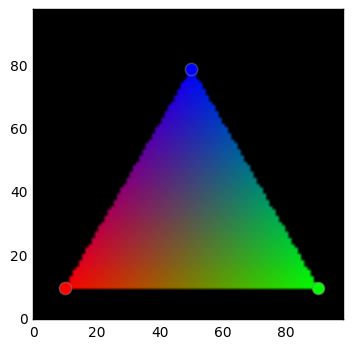

In [168]:
cmap2d.plot_cmap(cmap=cmap, scale=1, constrain=True, show_colors=True)

We can also see how this colormap handles values outside of the triangular region specified.

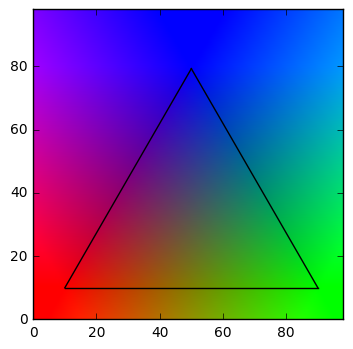

In [169]:
cmap2d.plot_cmap(cmap=cmap, scale=1)

Now let's try a rectangular region with a different colormap implementation:

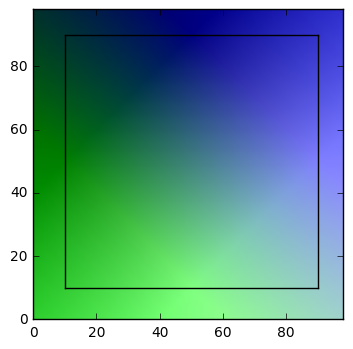

In [170]:
square_coords = [[10,10], [90,10], [90,90], [10,90]]
square_colors = [(0,1,0), (1,1,1), (0,0,1), (0,0,0)]
cmap = cmap2d.SimplexColorMap(square_coords, square_colors)
cmap2d.plot_cmap(cmap=cmap, scale=1)

We can easily compare the two ColorMaps over the two different regions in a single plot with the `run_tests` command:

plotting TernaryColorMap region 0
plotting TernaryColorMap region 1
plotting SimplexColorMap region 0
plotting SimplexColorMap region 1


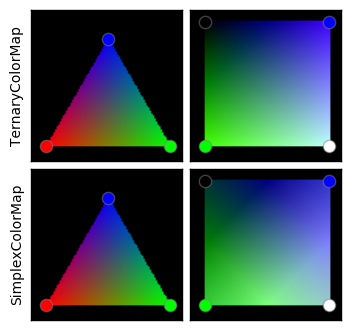

In [175]:
regions = [[tri_coords, tri_colors],[square_coords, square_colors]]
classes = [cmap2d.TernaryColorMap, cmap2d.SimplexColorMap]
cmap2d.compare(classes, regions, scale=1)

# Sampling Colors

Generating and comparing arbitrary colormaps is all well and good, but let's actually use it on some data! Below we generate some random data, just to show how you'd use this package, but you could easily use any 2-variable data...

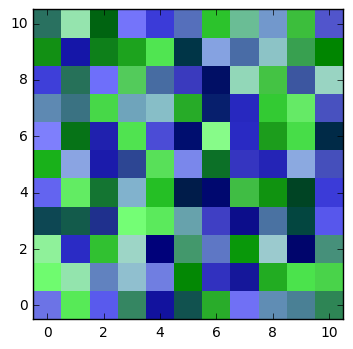

In [172]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 11)
x,y = np.meshgrid(x, x)

cmap = cmap2d.SimplexColorMap(square_coords, square_colors)

colors = np.zeros([11,11]).tolist()

for i,xv in enumerate(x):
    for j,yv in enumerate(y):
        r1 = np.random.sample()*100
        r2 = np.random.sample()*100
        colors[i][j] = cmap((r1, r2))

plt.imshow(colors, origin='lower', interpolation='none')
plt.show()

# Wrapup

We conclude with a comparison of all the ColorMaps, for various color regions.

plotting SimplexColorMap shape 0
plotting SimplexColorMap shape 1
plotting SimplexColorMap shape 2
plotting SimplexColorMap shape 3
plotting TernaryColorMap shape 0
plotting TernaryColorMap shape 1
plotting TernaryColorMap shape 2
plotting TernaryColorMap shape 3
plotting ProjectionColorMap shape 0
plotting ProjectionColorMap shape 1
plotting ProjectionColorMap shape 2
plotting ProjectionColorMap shape 3
plotting AvgColorMap shape 0
plotting AvgColorMap shape 1
plotting AvgColorMap shape 2
plotting AvgColorMap shape 3
plotting ColorMapCrude shape 0
plotting ColorMapCrude shape 1
plotting ColorMapCrude shape 2
plotting ColorMapCrude shape 3
plotting ColorMap shape 0
plotting ColorMap shape 1
plotting ColorMap shape 2
plotting ColorMap shape 3
plotting ColorMap2 shape 0
plotting ColorMap2 shape 1
plotting ColorMap2 shape 2
plotting ColorMap2 shape 3


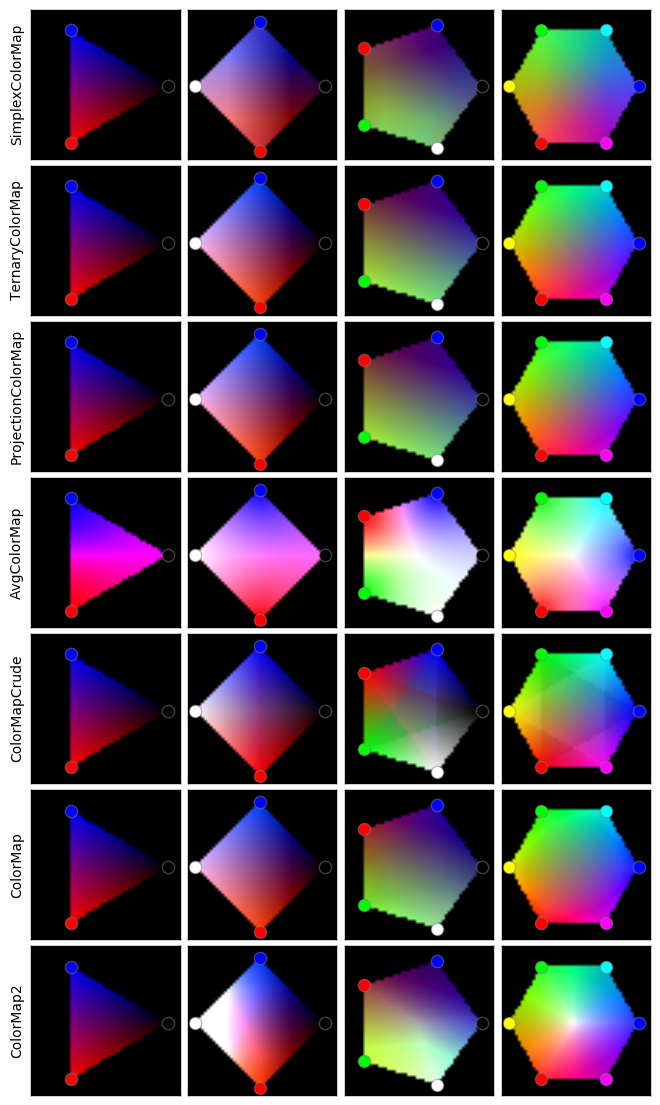

In [173]:
samples = cmap2d.generate_sample_regions(45)
classes = [cmap2d.SimplexColorMap, cmap2d.TernaryColorMap, 
           cmap2d.ProjectionColorMap, cmap2d.AvgColorMap,
           cmap2d.ColorMapCrude, cmap2d.ColorMap, cmap2d.ColorMap2]
cmap2d.compare(classes, samples, scale=2)